# Problem Statement
This project aims to analyze and compare the net engagement of TikTok videos that are moderated versus unmoderated. The goal is to identify the relationship between user engagement and moderatable content. Based on engagement patters we will be predicting whether content will be moderated or not.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

In [14]:
# Loading the data
df = pd.read_csv('/Users/alex/Desktop/github_projects/unsupervised_learning/tiktok_dataset.csv')

# A quick overview of the dataset
df.head()
df.tail()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


# Data Cleaning
Identifying missing values, and given relatively small number of rows in question, removing these, as well as duplicates - which could affect the analysis.

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

# Removing rows with missing values
df_cleaned = df.dropna()
df.drop_duplicates(inplace=True)


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


# Summary Stats - numerical and categorical columns
Understanding the distribution of video_view_count, video_like_count, video_share_count and video_comment_count to visualise the key engagement metrics. These numerical distributions are highly skewed so I will be using logarithmic scaling to get a better view of the patterns.

For the categorical columns, verified_status, claim_status and author_ban_status, it makes sense to plot bar charts to explore the distribution of each category.

/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

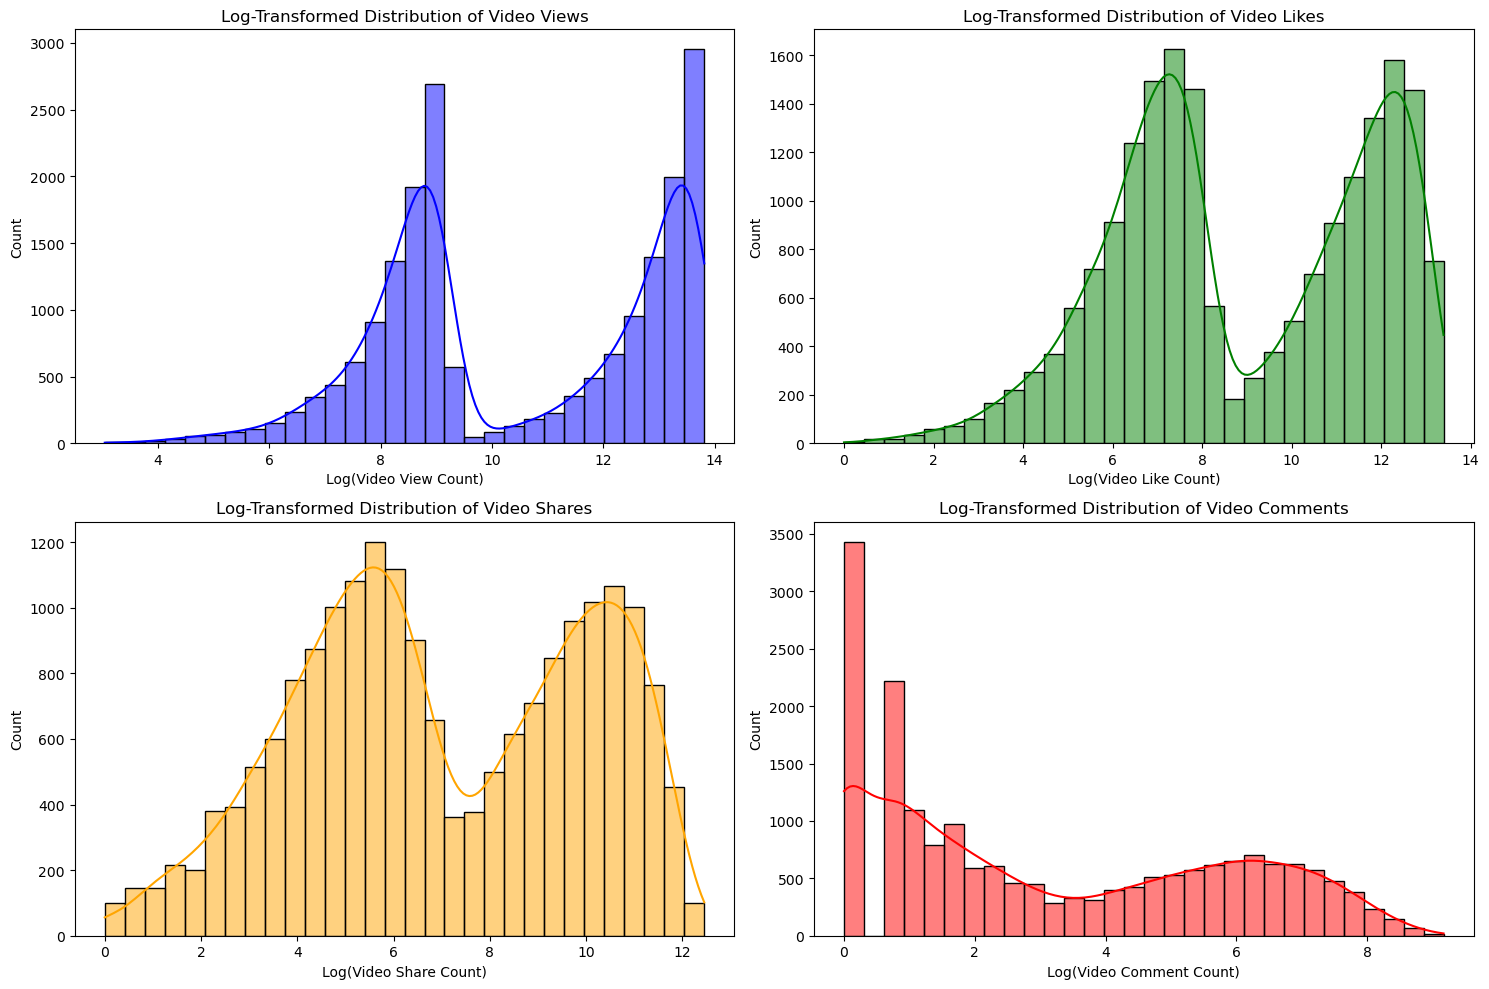

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Adding 1 to avoid log(0) which is undefined
df['log_video_view_count'] = np.log1p(df['video_view_count'])
df['log_video_like_count'] = np.log1p(df['video_like_count'])
df['log_video_share_count'] = np.log1p(df['video_share_count'])
df['log_video_comment_count'] = np.log1p(df['video_comment_count'])

plt.figure(figsize=(15, 10))

# Plotting the distribution of log-transformed video view count
plt.subplot(2, 2, 1)
sns.histplot(df['log_video_view_count'], bins=30, kde=True, color='blue')
plt.title('Log-Transformed Distribution of Video Views')
plt.xlabel('Log(Video View Count)')

# Plotting the distribution of log-transformed video like count
plt.subplot(2, 2, 2)
sns.histplot(df['log_video_like_count'], bins=30, kde=True, color='green')
plt.title('Log-Transformed Distribution of Video Likes')
plt.xlabel('Log(Video Like Count)')

# Plotting the distribution of log-transformed video share count
plt.subplot(2, 2, 3)
sns.histplot(df['log_video_share_count'], bins=30, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Video Shares')
plt.xlabel('Log(Video Share Count)')

# Plotting the distribution of log-transformed video comment count
plt.subplot(2, 2, 4)
sns.histplot(df['log_video_comment_count'], bins=30, kde=True, color='red')
plt.title('Log-Transformed Distribution of Video Comments')
plt.xlabel('Log(Video Comment Count)')

plt.tight_layout()

plt.show()



# Analysis:

Common patters: all 4 show skewness, even after the log transformation. Views, likes and shares all have a bimodal distribution which could indicate distinct group behaviours.
The distributions are typical of social media, where a minority of content captures the majority of interactions. 

View/ like/ share count graph - we see that there are two groups of videos, some gaining far more virality than others. The similarity in patterns could indicate that the three engagement metrics are correlated - videos with views are more likely to get likes and shares, etc.

Comments have a different shape, very skewed towards lower values. This could be related to the "switch off comments" feature used in many viral videos, or could also suggest that commenting requires a higher level of engagement than the other metrics.

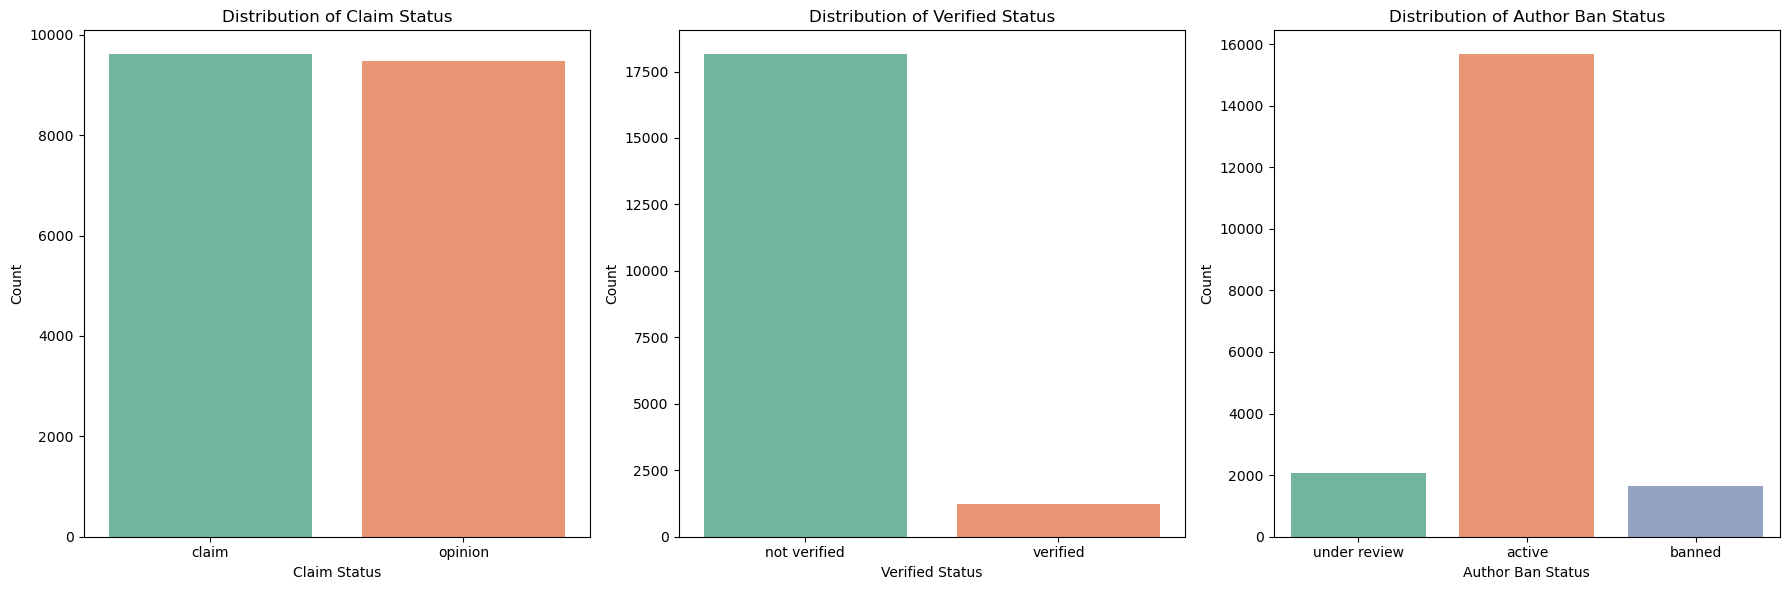

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Plotting the distribution of claim_status
plt.subplot(1, 3, 1)
sns.countplot(x='claim_status', data=df, palette='Set2')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')

# Plotting the distribution of verified_status
plt.subplot(1, 3, 2)
sns.countplot(x='verified_status', data=df, palette='Set2')
plt.title('Distribution of Verified Status')
plt.xlabel('Verified Status')
plt.ylabel('Count')

# Plotting the distribution of author_ban_status
plt.subplot(1, 3, 3)
sns.countplot(x='author_ban_status', data=df, palette='Set2')
plt.title('Distribution of Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Count')

plt.tight_layout()

plt.show()


# Analysis:

Claim status is evenly distributed which would be useful for an analysis of how claims and opinions impact engagement  
Dominance of not verified statuses suggests that the engagement dynamics will mostly end up reflecting non verified user behaviour
Most content comes from non-banned authors, which makes sense as only these can repeatedly post and therefore gather engagement

Engagement score will be calculated as (video_like_count + video_share_count + video_comment_count)/(video_view_count + 1) which is the industry standard principle for calculating engagementrelative to visibility

# Exploring engagement scores vs moderation status:

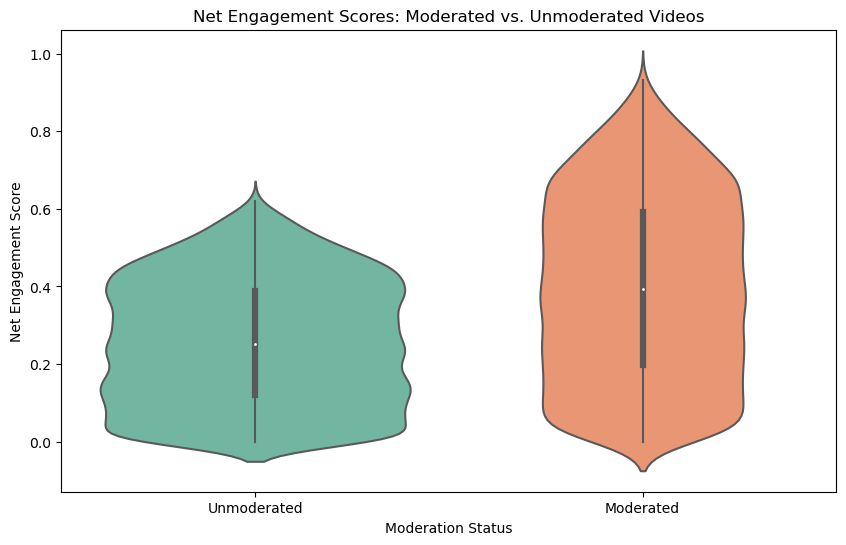

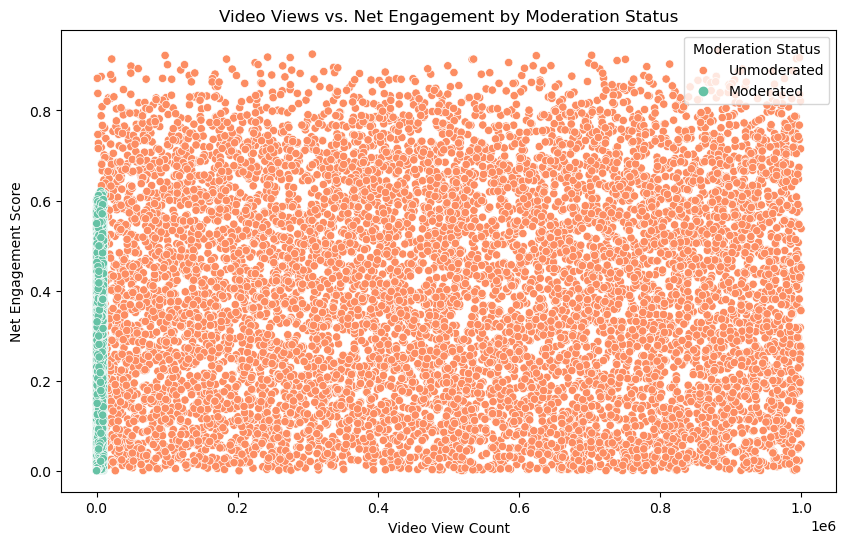

In [38]:
engagement_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count']

for col in engagement_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[engagement_columns] = df[engagement_columns].fillna(0)

df['net_engagement'] = (df['video_like_count'] + df['video_share_count'] + df['video_comment_count']) / (df['video_view_count'] + 1)


df['claim_status'] = df['claim_status'].astype(str).str.lower()  
df['moderated'] = df['claim_status'].apply(lambda x: 1 if 'claim' in x else 0)

plt.figure(figsize=(10, 6))
sns.violinplot(x='moderated', y='net_engagement', data=df, palette='Set2')
plt.title('Net Engagement Scores: Moderated vs. Unmoderated Videos')
plt.xticks([0, 1], ['Unmoderated', 'Moderated'])
plt.xlabel('Moderation Status')
plt.ylabel('Net Engagement Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='video_view_count', y='net_engagement', hue='moderated', data=df, palette='Set2')
plt.title('Video Views vs. Net Engagement by Moderation Status')
plt.xlabel('Video View Count')
plt.ylabel('Net Engagement Score')
plt.legend(title='Moderation Status', labels=['Unmoderated', 'Moderated'])
plt.show()




# Analysis:

Unmoderated videos have a median net engagement score just under 0.2, which is similar to unmoderated videos
Unmoderated videos have a narrower top, suggesting less high engagement outliers 

The scatterplot suggests a wide range of engagement scores across the data set given how spread all the values are. There seems to be no relationship between number of views and net engagement scores, likely due to the way engagement was calculated, which allows for the idea that videos with varying views can have similar engagement levels 

Moderated videos don't seem to reach high view counts, showing a clear impact of the moderation

Put together, we can see that moderation limits reach, but not the quality of the engagement - visibility seems to be the key barrier for moderation videos